In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from datasets.utils import generate_train_and_test_data
from datasets.segmentation.circle_segmentation import circle_segmentation_sample

In [3]:
(X_train, Y_train), (X_test, Y_test) = \
    generate_train_and_test_data(circle_segmentation_sample, width=32, height=32)

In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [56]:
# https://arxiv.org/pdf/1606.00915v1.pdf

input = keras.layers.Input((32,32,3))

hidden = keras.layers.Conv2D(32, (3,3), activation="relu", padding="same")(input) 
hidden = keras.layers.Dropout(0.1)(hidden)
hidden = keras.layers.MaxPool2D((2,2))(hidden)                                    

hidden = keras.layers.Conv2D(64, (3,3), activation="relu", dilation_rate=2, padding="same")(hidden) 
hidden = keras.layers.Dropout(0.1)(hidden)


branch1 = keras.layers.Conv2D(64, (3, 3), activation='relu', dilation_rate=3, padding="same")(hidden)
branch1 = keras.layers.Conv2D(64, (1, 1), activation='relu')(branch1)
branch1 = keras.layers.Conv2D(1, (1, 1))(branch1)

branch2 = keras.layers.Conv2D(64, (3, 3), activation='relu', dilation_rate=4, padding="same")(hidden)
branch2 = keras.layers.Conv2D(64, (1, 1), activation='relu')(branch2)
branch2 = keras.layers.Conv2D(1, (1, 1))(branch2)

branch3 = keras.layers.Conv2D(64, (3, 3), activation='relu', dilation_rate=5, padding="same")(hidden)
branch3 = keras.layers.Conv2D(64, (1, 1), activation='relu')(branch3)
branch3 = keras.layers.Conv2D(1, (1, 1))(branch3)

asspp = keras.layers.Add()([branch1, branch2, branch3])
sigmoid = keras.layers.Activation('sigmoid')(asspp)
output = keras.layers.UpSampling2D(size=(2, 2), interpolation="bilinear")(sigmoid)

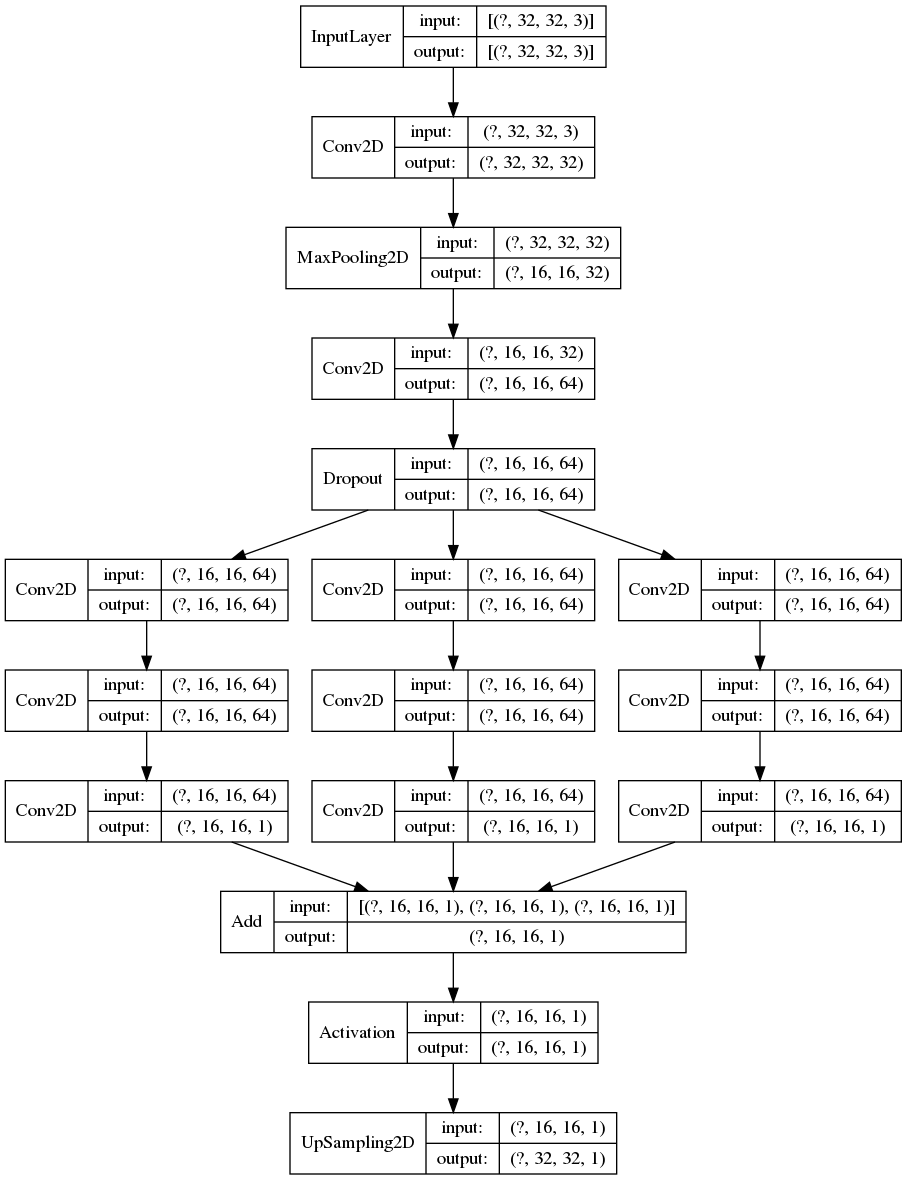

In [58]:
keras.utils.plot_model(model, show_layer_names=False, show_shapes=True)

In [62]:
# CRF

In [59]:
model = keras.models.Model(input, output)

In [60]:
model.compile("adam", "binary_crossentropy")

In [61]:
model.fit(X_train, Y_train, epochs=20, batch_size=64)

Train on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 21s 2ms/sample - loss: 0.2136
Epoch 2/20
10000/10000 [==============================] - 22s 2ms/sample - loss: 0.1252
Epoch 3/20
10000/10000 [==============================] - 22s 2ms/sample - loss: 0.0967
Epoch 4/20
10000/10000 [==============================] - 22s 2ms/sample - loss: 0.0791
Epoch 5/20
10000/10000 [==============================] - 22s 2ms/sample - loss: 0.0684
Epoch 6/20
10000/10000 [==============================] - 22s 2ms/sample - loss: 0.0620
Epoch 7/20
10000/10000 [==============================] - 22s 2ms/sample - loss: 0.0576
Epoch 8/20
10000/10000 [==============================] - 22s 2ms/sample - loss: 0.0536
Epoch 9/20
10000/10000 [==============================] - 23s 2ms/sample - loss: 0.0507
Epoch 10/20
10000/10000 [==============================] - 23s 2ms/sample - loss: 0.0488
Epoch 11/20
10000/10000 [==============================] - 25s 3ms/sample - loss: 0.0469
Epoch 1

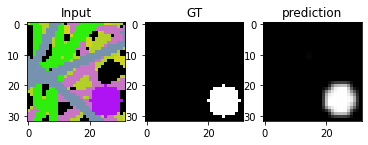

In [74]:
import matplotlib.pyplot as plt
idx = np.random.randint(X_test.shape[0])

ax = plt.subplot(131)
ax.imshow(X_train[idx,:,:])
ax.set_title("Input")
ax = plt.subplot(132)
ax.imshow(Y_train[idx,:,:,0], cmap="gray")
ax.set_title("GT")
ax = plt.subplot(133)
ax.imshow(model.predict(X_train[idx:idx+1])[0,:,:,0], cmap="gray")
ax.set_title("prediction")
plt.show()

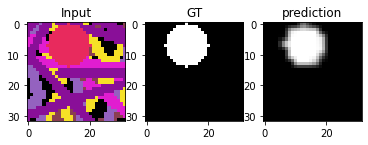

In [77]:
import matplotlib.pyplot as plt
idx = np.random.randint(X_test.shape[0])

ax = plt.subplot(131)
ax.imshow(X_test[idx,:,:])
ax.set_title("Input")
ax = plt.subplot(132)
ax.imshow(Y_test[idx,:,:,0], cmap="gray")
ax.set_title("GT")
ax = plt.subplot(133)
ax.imshow(model.predict(X_test[idx:idx+1])[0,:,:,0], cmap="gray")
ax.set_title("prediction")
plt.show()